In [1]:
# Turn on Auto-Complete
%config IPCompleter.greedy=True

In [2]:
# Start logging process at root level
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logging.root.setLevel(level=logging.INFO)

In [3]:
# Load model and dictionary
model_path ="models/wiki-en-190409-s300-w5-mc1-bw10000-cbow-i5-c10-unlem.model"
dictionary_path = "dictionaries/enwiki-20190409-dict-unlemmatized.txt.bz2"
is_lemmatized = False

In [4]:
# Load word2vec unlemmatized model
from gensim.models import Word2Vec
model = Word2Vec.load(model_path, mmap='r')

2019-05-09 21:43:53,243 : INFO : 'pattern' package found; tag filters are available for English
2019-05-09 21:43:53,254 : INFO : loading Word2Vec object from models/wiki-en-190409-s300-w5-mc1-bw10000-cbow-i5-c10-unlem.model
2019-05-09 21:45:13,816 : INFO : loading wv recursively from models/wiki-en-190409-s300-w5-mc1-bw10000-cbow-i5-c10-unlem.model.wv.* with mmap=r
2019-05-09 21:45:13,818 : INFO : loading vectors from models/wiki-en-190409-s300-w5-mc1-bw10000-cbow-i5-c10-unlem.model.wv.vectors.npy with mmap=r
2019-05-09 21:45:13,822 : INFO : setting ignored attribute vectors_norm to None
2019-05-09 21:45:13,825 : INFO : loading vocabulary recursively from models/wiki-en-190409-s300-w5-mc1-bw10000-cbow-i5-c10-unlem.model.vocabulary.* with mmap=r
2019-05-09 21:45:13,827 : INFO : loading trainables recursively from models/wiki-en-190409-s300-w5-mc1-bw10000-cbow-i5-c10-unlem.model.trainables.* with mmap=r
2019-05-09 21:45:13,828 : INFO : loading syn1neg from models/wiki-en-190409-s300-w5-m

In [5]:
# Saving some ram by using the KeyedVectors instance
wv = model.wv
#del model

In [6]:
# Translate a string
vocabulary = set(model.wv.index2word)
#del vocabulary

2019-05-09 22:31:58,746 : INFO : precomputing L2-norms of word weight vectors


ValueError: output array is read-only

In [50]:
word = "federer"
word_vector_normed = model.wv.word_vec(word, use_norm=False)
#word = wv['federer']
word_vector_normed

memmap([-6.18925393e-01, -2.63230252e+00, -4.08494830e-01,
        -2.00294518e+00,  7.08984435e-01,  2.05416489e+00,
        -5.16878188e-01, -7.01288223e-01, -9.48285997e-01,
         2.88235843e-01,  1.15889668e+00,  2.01796699e+00,
        -5.30680895e-01,  2.73732972e+00, -1.80597043e+00,
        -1.14714420e+00, -1.43301988e+00, -4.15284443e+00,
         1.98107028e+00,  7.92585015e-01, -2.36859381e-01,
         2.46196198e+00, -1.18992245e+00, -6.58327639e-01,
        -9.92180824e-01, -1.46043614e-01, -1.19345474e+00,
        -2.84575129e+00,  8.00136179e-02,  2.64145803e+00,
        -1.99233806e+00, -6.28322303e-01,  8.87283027e-01,
         1.82593536e+00,  1.51064873e+00, -1.52190673e+00,
         2.14218330e+00, -4.90742713e-01, -9.56747010e-02,
        -9.96588886e-01,  1.51458633e+00,  2.87261534e+00,
        -1.51088393e+00, -1.92478740e+00, -4.52478361e+00,
         6.67510509e-01, -1.02351856e+00, -7.61030197e-01,
         1.53777480e+00, -9.06242132e-01,  8.44932735e-0

In [40]:
word_vector_normed.max()

6.1862965

In [41]:
word_vector_normed.min()

-6.0889597

In [98]:
import numpy as np
word = "federer"
word_vector= model.wv.word_vec(word, use_norm=False)

max_value = word_vector.max()
min_value = word_vector.min()

higher_vectors = []
lower_vectors = []
for i in range(word_vector.shape[0]):
    tmp = np.array(word_vector, dtype="float32")
    tmp[i] = max_value
    higher_vectors.append(tmp)
    
    tmp = np.array(word_vector, dtype="float32")
    tmp[i] = min_value
    lower_vectors.append(tmp)

#lower_vectors = np.array(lower_vectors[:], dtype="float32")
#print(lower_vectors)

In [121]:
top = 5
similar_word_vector = wv.most_similar(positive=[word_vector], topn=top)
print(similar_word_vector,"\n")

for v in range(len(higher_vectors)):
    similar_vector = wv.most_similar(positive=[higher_vectors[v]], topn=top)
    for i in range(len(similar_word_vector)):
        if (similar_word_vector[i][0] != similar_vector[i][0]):
            #print(i,": similar_vector :",similar_vector[i])
            print(v,":",similar_vector,"-> d:",round(np.linalg.norm(word_vector-vector),3))
            break
            

[('federer', 1.0000001192092896), ('djokovic', 0.7750359773635864), ('nadal', 0.767400324344635), ('wawrinka', 0.6816220879554749), ('vasselin', 0.6664406657218933)] 

1 : [('federer', 0.9674688577651978), ('nadal', 0.7478001117706299), ('djokovic', 0.7464911341667175), ('wawrinka', 0.6668081879615784), ('vasselin', 0.645194411277771)] -> d: 4.0 2
2 : [('federer', 0.981936514377594), ('nadal', 0.7617033123970032), ('djokovic', 0.7577941417694092), ('wawrinka', 0.6747866868972778), ('vasselin', 0.6540257930755615)] -> d: 4.0 2
3 : [('federer', 0.9720087051391602), ('nadal', 0.7415935397148132), ('djokovic', 0.73969566822052), ('wawrinka', 0.6468362808227539), ('vasselin', 0.6392979621887207)] -> d: 4.0 2
4 : [('federer', 0.9875750541687012), ('djokovic', 0.7640445828437805), ('nadal', 0.760971188545227), ('vasselin', 0.6648596525192261), ('wawrinka', 0.6628337502479553)] -> d: 4.0 2
6 : [('federer', 0.9813322424888611), ('nadal', 0.745172917842865), ('djokovic', 0.743195652961731), ('va

185 : [('federer', 0.9869067668914795), ('nadal', 0.7604039907455444), ('djokovic', 0.7555937767028809), ('wawrinka', 0.6719104051589966), ('vasselin', 0.6650811433792114)] -> d: 4.0 2
188 : [('federer', 0.988337516784668), ('nadal', 0.7713549137115479), ('djokovic', 0.7697630524635315), ('wawrinka', 0.662985622882843), ('vasselin', 0.6464152336120605)] -> d: 4.0 2
190 : [('federer', 0.9796915054321289), ('nadal', 0.75789475440979), ('djokovic', 0.7564153671264648), ('wawrinka', 0.6628149747848511), ('vasselin', 0.6421921849250793)] -> d: 4.0 2
191 : [('federer', 0.945972740650177), ('djokovic', 0.7349231243133545), ('nadal', 0.7236721515655518), ('wawrinka', 0.6258434057235718), ('berdych', 0.6246836185455322)] -> d: 4.0 2
192 : [('federer', 0.9749240279197693), ('djokovic', 0.7552589178085327), ('nadal', 0.7437648177146912), ('vasselin', 0.658270001411438), ('wawrinka', 0.6569598913192749)] -> d: 4.0 2
194 : [('federer', 0.9790613651275635), ('nadal', 0.7561460137367249), ('djokovic'

In [101]:
higher_vectors[0][:10]

array([ 6.1862965 , -2.6323025 , -0.40849483, -2.0029452 ,  0.70898443,
        2.054165  , -0.5168782 , -0.7012882 , -0.948286  ,  0.28823584],
      dtype=float32)

In [102]:
higher_vectors[1][:10]

array([-0.6189254 ,  6.1862965 , -0.40849483, -2.0029452 ,  0.70898443,
        2.054165  , -0.5168782 , -0.7012882 , -0.948286  ,  0.28823584],
      dtype=float32)

In [91]:
wv.most_similar(positive=[word_vector])

[('federer', 1.0000001192092896),
 ('djokovic', 0.7750359773635864),
 ('nadal', 0.767400324344635),
 ('wawrinka', 0.6816220879554749),
 ('vasselin', 0.6664406657218933),
 ('berdych', 0.645709753036499),
 ('mahut', 0.6398465633392334),
 ('sampras', 0.6329268217086792),
 ('verdasco', 0.6302427649497986),
 ('roddick', 0.622452974319458)]

In [92]:
wv.most_similar(positive=[lower_vectors])

[('federer', 1.0000001192092896),
 ('djokovic', 0.7750359773635864),
 ('nadal', 0.767400324344635),
 ('wawrinka', 0.6816220879554749),
 ('vasselin', 0.6664406657218933),
 ('berdych', 0.645709753036499),
 ('mahut', 0.6398465633392334),
 ('sampras', 0.6329268217086792),
 ('verdasco', 0.6302427649497986),
 ('roddick', 0.622452974319458)]

In [103]:
wv.most_similar(positive=[higher_vectors[0]])

[('federer', 0.980754017829895),
 ('djokovic', 0.7609372735023499),
 ('nadal', 0.759452223777771),
 ('wawrinka', 0.6838314533233643),
 ('vasselin', 0.6651499271392822),
 ('berdych', 0.6336572170257568),
 ('mahut', 0.6318328380584717),
 ('verdasco', 0.6219873428344727),
 ('roddick', 0.6185396909713745),
 ('sampras', 0.6147887706756592)]

In [125]:
top = 10
similar_vectors = wv.most_similar(positive=[word_vector], topn=top)

In [126]:
my_vocabulary = []
for vector in similar_vectors:
    my_vocabulary.append(vector[0])
    
#print(my_vocabulary)

['federer', 'djokovic', 'nadal', 'wawrinka', 'vasselin']


In [ ]:
labels = []
tokens = []
for word in my_vocabulary:
    tokens.append(model[word])
    labels.append(word)
    
#print(tokens)
#print(labels)

In [132]:
from sklearn.manifold import TSNE
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)

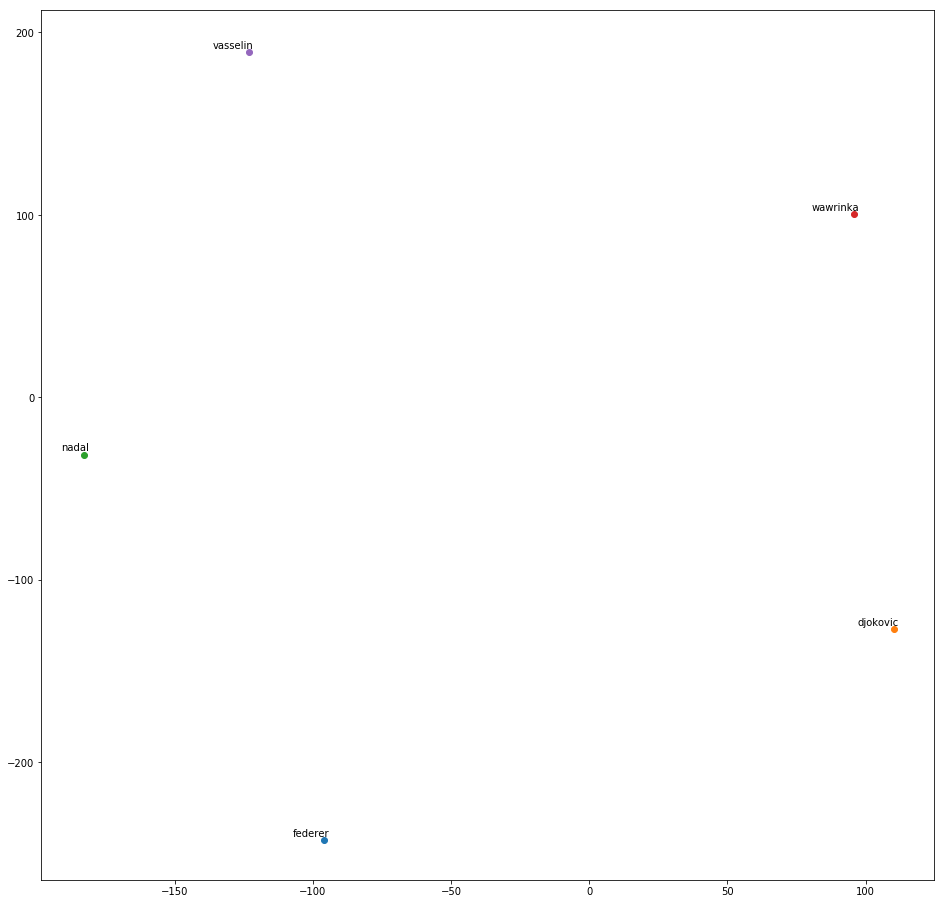

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

In [149]:
top = 10
similar_vectors = wv.most_similar(positive=[word_vector], topn=top)

my_vocabulary = []
for vector in similar_vectors:
    my_vocabulary.append(vector[0])

print(my_vocabulary)

['federer', 'djokovic', 'nadal', 'wawrinka', 'vasselin', 'berdych', 'mahut', 'sampras', 'verdasco', 'roddick']


In [152]:
for v in range(len(higher_vectors)):
    similar_vector = wv.most_similar(positive=[higher_vectors[v]], topn=top)
    for i in range(len(similar_word_vector)):
        if (similar_word_vector[i][0] not in my_vocabulary):
            my_vocabulary.append(similar_word_vector[i][0])
            if (i%5==0): print(i)
print(my_vocabulary)

['federer', 'djokovic', 'nadal', 'wawrinka', 'vasselin', 'berdych', 'mahut', 'sampras', 'verdasco', 'roddick']


In [168]:
import time

top = 10
similar_vector = wv.most_similar(positive=[word_vector], topn=top)
print(len(similar_vector))
print(similar_vector,"\n")

custom_vocabulary = []
for vector in similar_vectors:
    custom_vocabulary.append(vector[0])
    
vector_name = similar_vector[0][0]

print("intial vocab for \""+vector_name+"\"->",custom_vocabulary,"\n")

vector_len = len(higher_vectors)
start_time = time.time()
for v in range(vector_len):
    similar_word_vector = wv.most_similar(positive=[higher_vectors[v]], topn=top)
    for i in range(len(similar_word_vector)):
        if (similar_word_vector[i][0] not in custom_vocabulary):
            print(v,":",i,"->", similar_word_vector[i][0])
            custom_vocabulary.append(similar_word_vector[i][0])
    if (v!=0 and v%5==0): print(v,"/",vector_len, "iterations so far")
        #print(i, similar_word_vector[i][0])
    #print("\n")
end_time = time.time()
print("\nRunning time is {}s".format(end_time-start_time))
print("\nfinal vocab for: \"",vector_name,"\"",custom_vocabulary)

10
[('federer', 1.0000001192092896), ('djokovic', 0.7750359773635864), ('nadal', 0.767400324344635), ('wawrinka', 0.6816220879554749), ('vasselin', 0.6664406657218933), ('berdych', 0.645709753036499), ('mahut', 0.6398465633392334), ('sampras', 0.6329268217086792), ('verdasco', 0.6302427649497986), ('roddick', 0.622452974319458)] 

intial vocab for "federer"-> ['federer', 'djokovic', 'nadal', 'wawrinka', 'vasselin', 'berdych', 'mahut', 'sampras', 'verdasco', 'roddick'] 

2 : 7 -> raonic
5 / 300 iterations so far
7 : 9 -> davydenko
10 / 300 iterations so far
15 / 300 iterations so far
20 / 300 iterations so far
25 / 300 iterations so far
30 / 300 iterations so far
35 / 300 iterations so far
40 / 300 iterations so far
45 / 300 iterations so far
50 / 300 iterations so far
55 : 9 -> monfils
55 / 300 iterations so far
60 / 300 iterations so far
65 / 300 iterations so far
70 / 300 iterations so far
75 / 300 iterations so far
80 / 300 iterations so far
85 / 300 iterations so far
90 / 300 itera

NameError: name 'end_time' is not defined

In [176]:
print("\nfinal vocab for: \"",vector_name,"\"",custom_vocabulary)


final vocab for: " federer " ['federer', 'djokovic', 'nadal', 'wawrinka', 'vasselin', 'berdych', 'mahut', 'sampras', 'verdasco', 'roddick', 'raonic', 'davydenko', 'monfils', 'henin']


In [190]:
labels = []
tokens = []

label_count = 0
for vector in higher_vectors:            
    tokens.append(vector)
    #label = "federer_"+str(label_count)
    label = str(label_count)
    labels.append(label)
    label_count += 1
    
for word in custom_vocabulary:
    tokens.append(model[word])
    labels.append(word)
    
new_values = tsne_model.fit_transform(tokens)

/home/rclaret/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


<IPython.core.display.Javascript object>


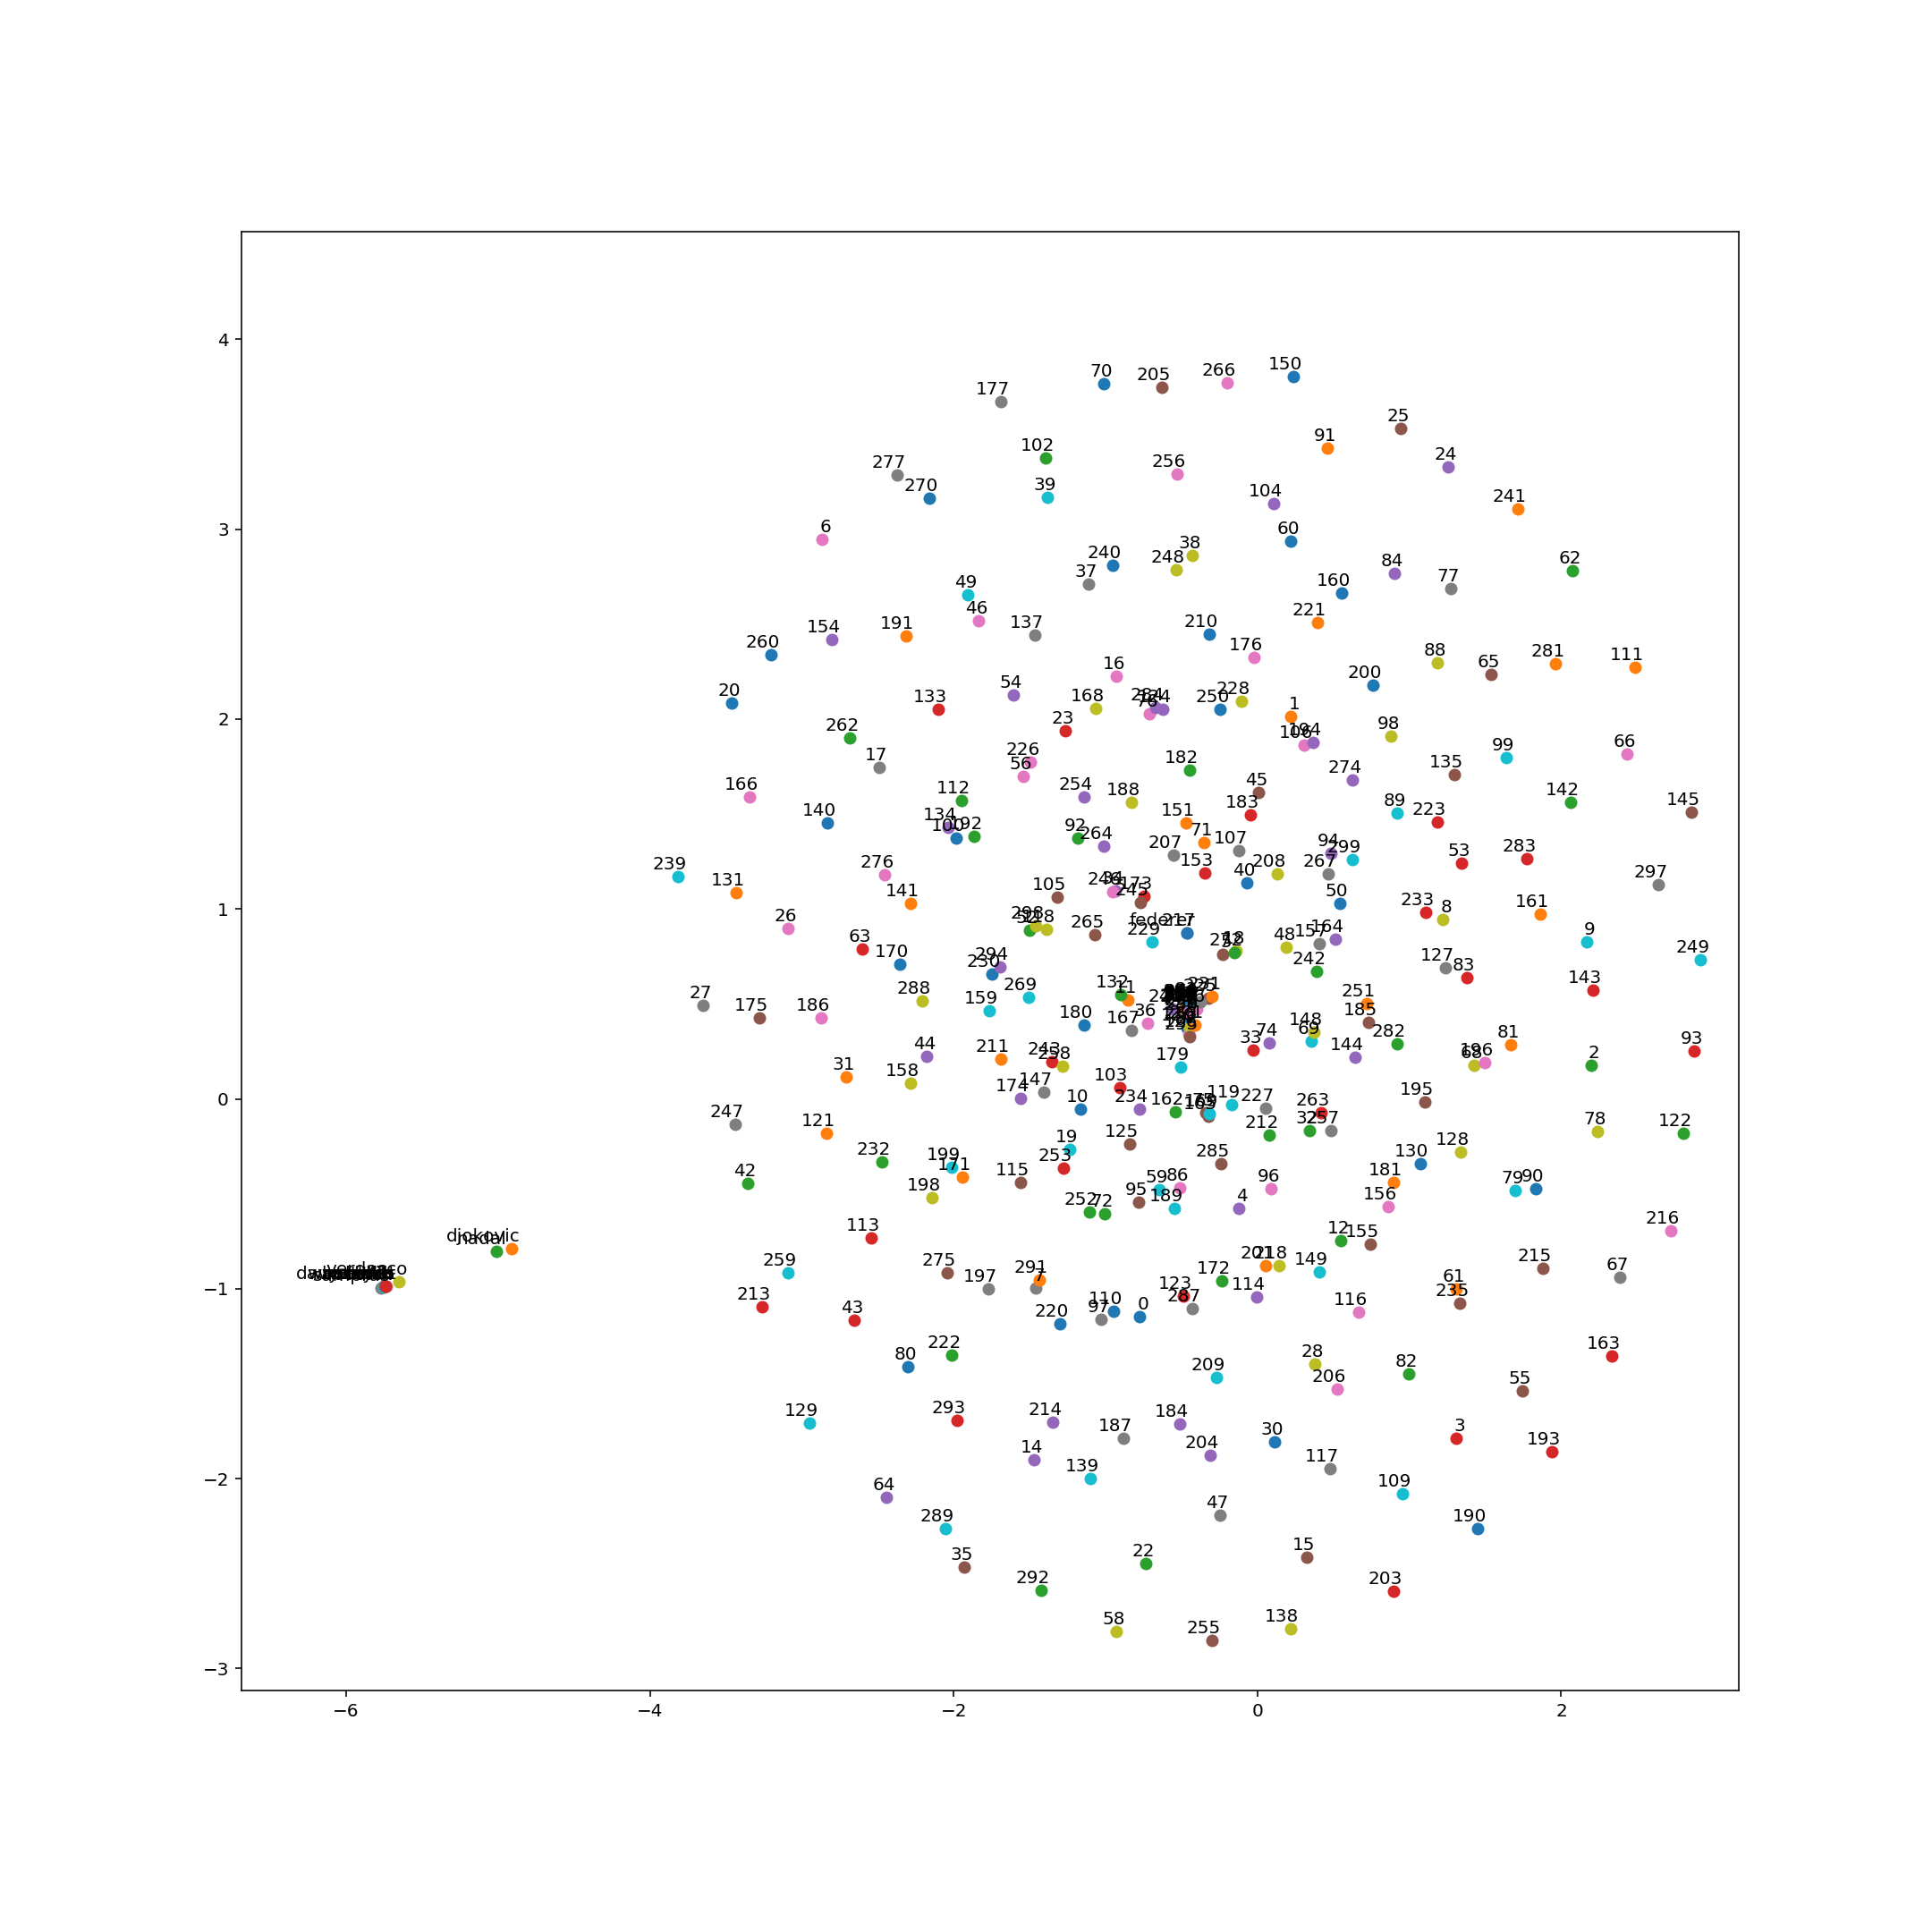

In [192]:
#import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('nbagg')
%matplotlib notebook

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(15, 15)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

In [175]:
import time

top = 50
similar_vector = wv.most_similar(positive=[word_vector], topn=top)
print(len(similar_vector))
print(similar_vector,"\n")

custom_vocabulary_50 = []
for vector in similar_vectors:
    custom_vocabulary_50.append(vector[0])
    
vector_name = similar_vector[0][0]

print("intial vocab for \""+vector_name+"\"->",custom_vocabulary_50,"\n")

vector_len = len(higher_vectors)
start_time = time.time()
for v in range(vector_len):
    similar_word_vector = wv.most_similar(positive=[higher_vectors[v]], topn=top)
    for i in range(len(similar_word_vector)):
        if (similar_word_vector[i][0] not in custom_vocabulary_50):
            print(v,":",i,"->", similar_word_vector[i][0])
            custom_vocabulary_50.append(similar_word_vector[i][0])
    if (v!=0 and v%5==0): print(v,"/",vector_len, "iterations so far")
        #print(i, similar_word_vector[i][0])
    #print("\n")
end_time = time.time()
print("\nRunning time is {}s".format(end_time-start_time))
print("\nfinal vocab for: \"",vector_name,"\"",custom_vocabulary_50)

50
[('federer', 1.0000001192092896), ('djokovic', 0.7750359773635864), ('nadal', 0.767400324344635), ('wawrinka', 0.6816220879554749), ('vasselin', 0.6664406657218933), ('berdych', 0.645709753036499), ('mahut', 0.6398465633392334), ('sampras', 0.6329268217086792), ('verdasco', 0.6302427649497986), ('roddick', 0.622452974319458), ('raonic', 0.6180839538574219), ('davydenko', 0.6130672097206116), ('monfils', 0.5975568294525146), ('henin', 0.5929373502731323), ('youzhny', 0.5913485884666443), ('kvitová', 0.5901915431022644), ('llodra', 0.5815512537956238), ('sharapova', 0.5812269449234009), ('isner', 0.5756784677505493), ('radwańska', 0.571659505367279), ('clijsters', 0.5716205835342407), ('safin', 0.5711002349853516), ('söderling', 0.5693570375442505), ('stosur', 0.5693114995956421), ('agassi', 0.5685186386108398), ('gasquet', 0.5664864778518677), ('benneteau', 0.5659803152084351), ('potro', 0.5621416568756104), ('wozniacki', 0.5597796440124512), ('kuznetsova', 0.5581992864608765), ('kue

In [193]:
labels = []
tokens = []

label_count = 0
for vector in higher_vectors:            
    tokens.append(vector)
    #label = "federer_"+str(label_count)
    label = str(label_count)
    labels.append(label)
    label_count += 1
    
for word in custom_vocabulary_50:
    tokens.append(model[word])
    labels.append(word)
    
new_values = tsne_model.fit_transform(tokens)

/home/rclaret/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


<IPython.core.display.Javascript object>


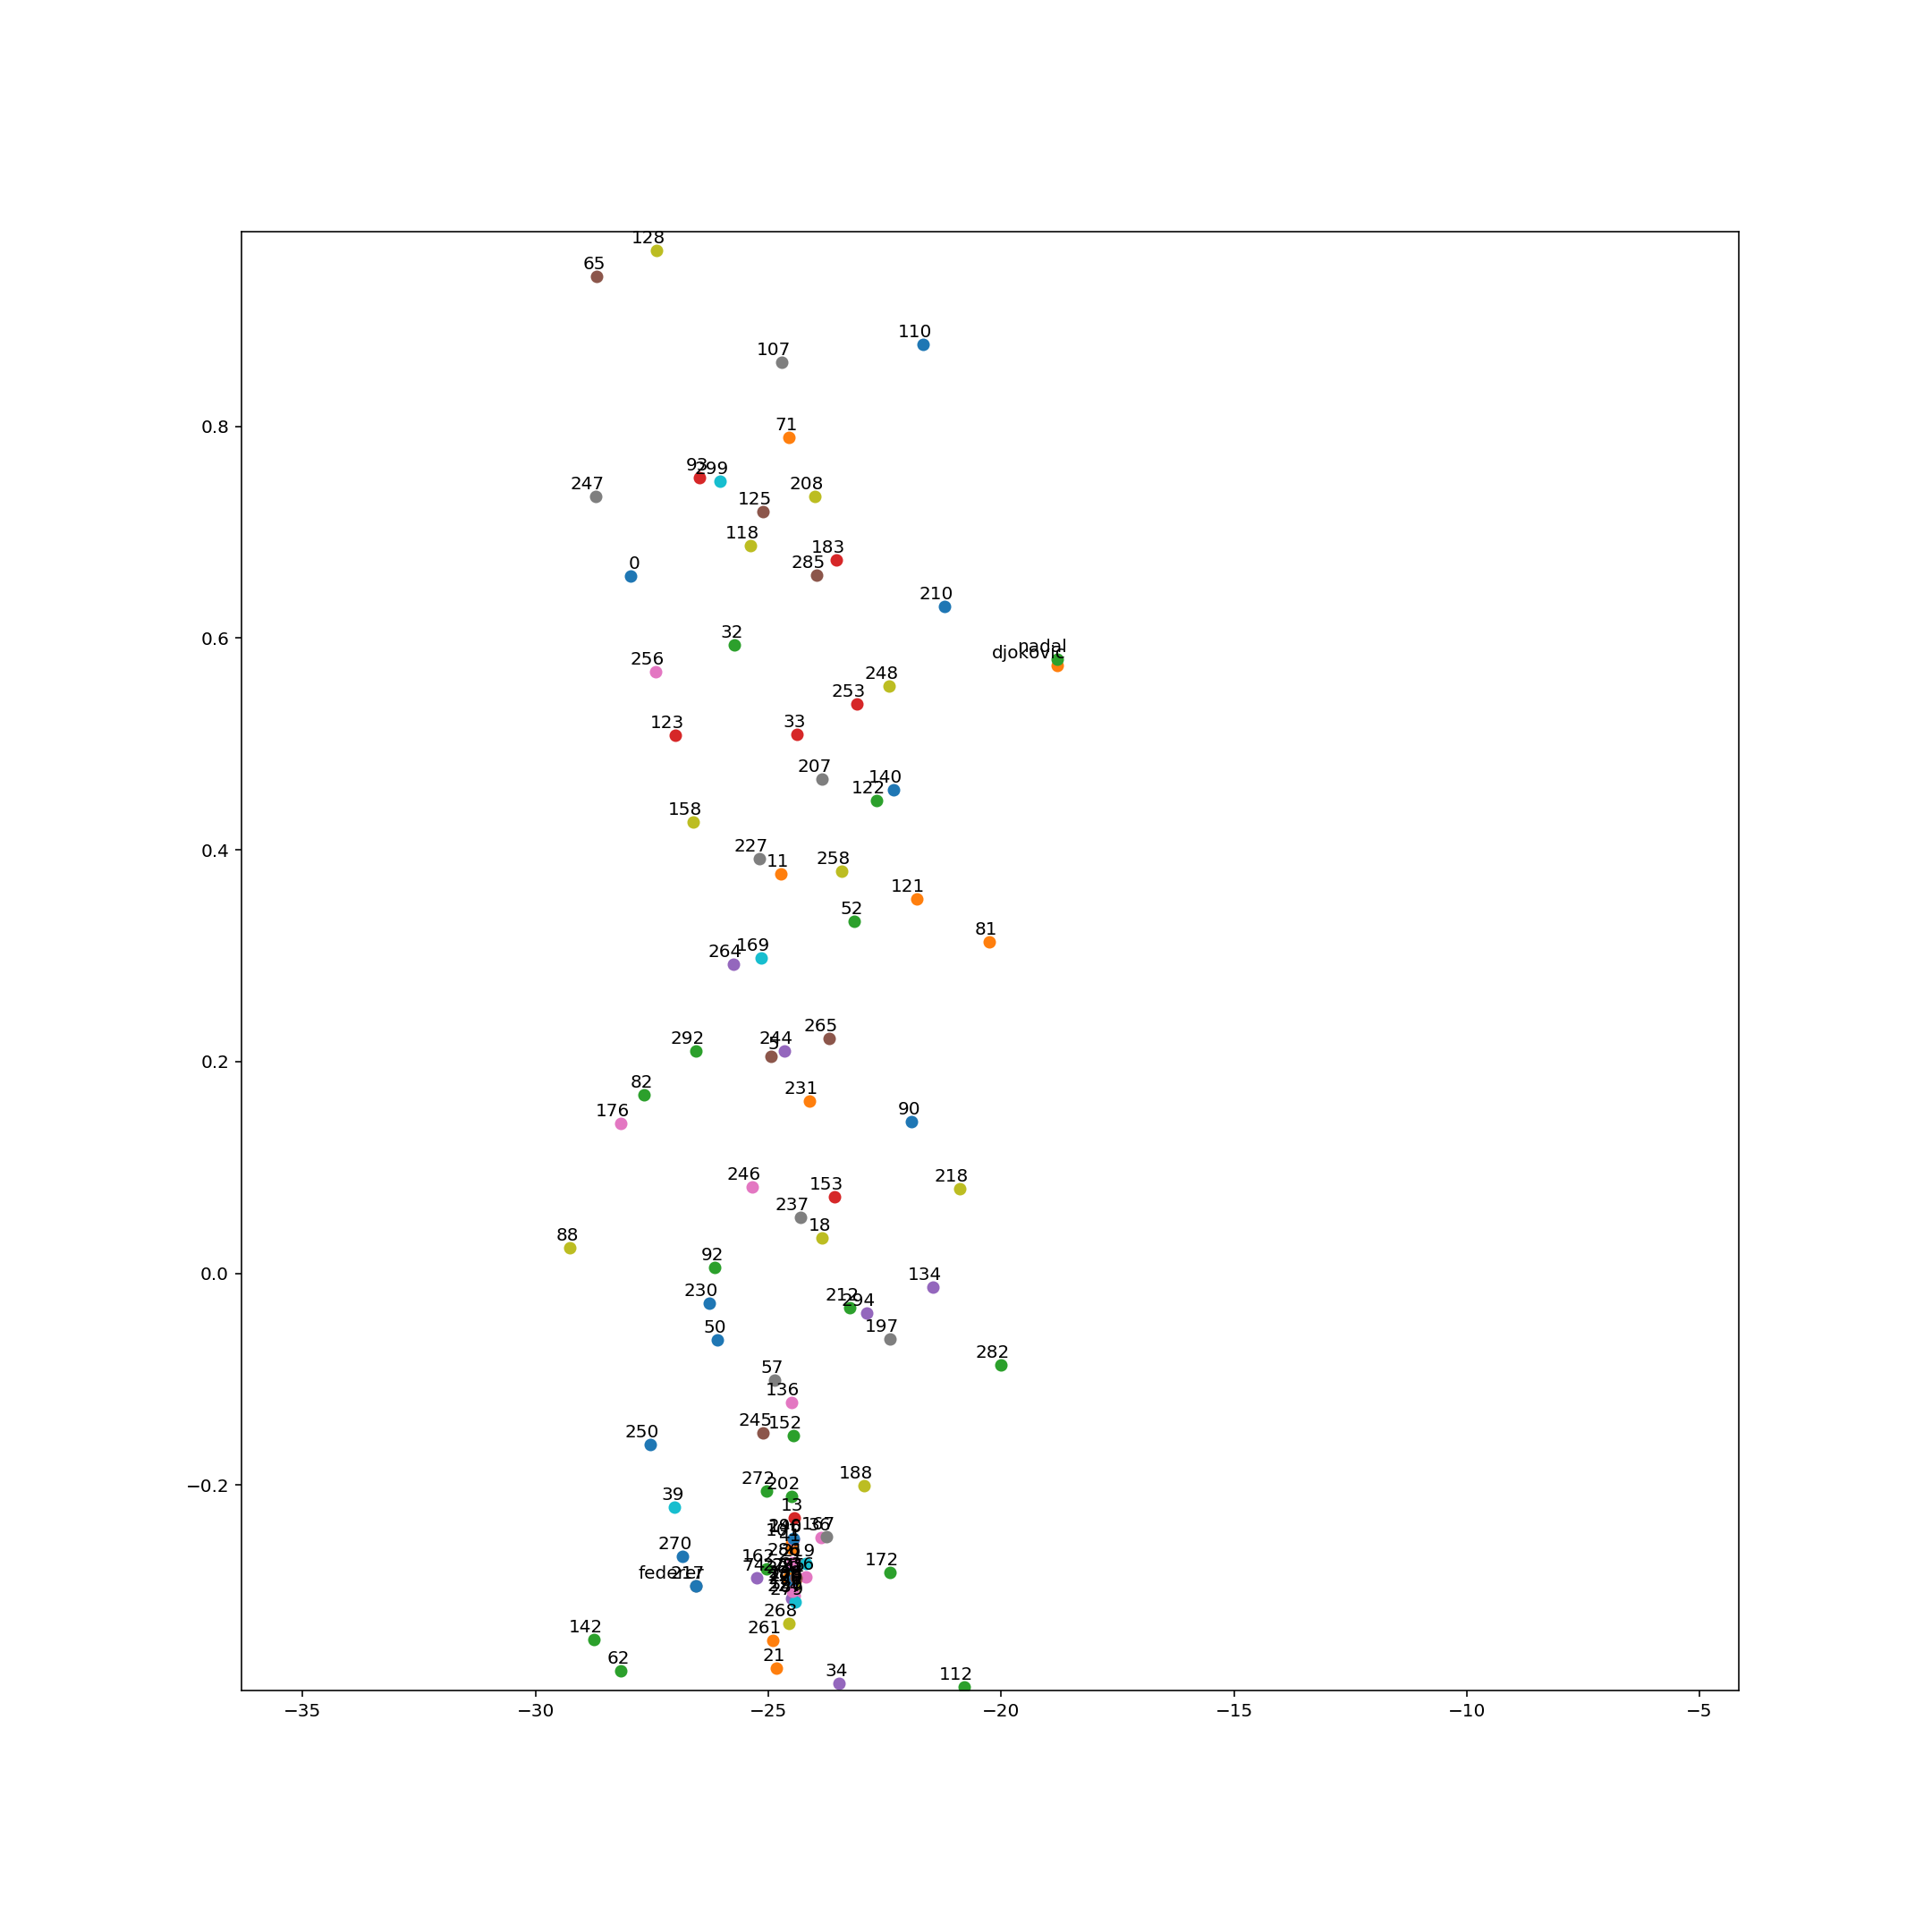

In [194]:
#import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('nbagg')
%matplotlib notebook

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(15, 15)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()

In [185]:
word_vector_federer = model.wv.word_vec("federer", use_norm=False)
word_vector_tiebreak = model.wv.word_vec("tiebreak", use_norm=False)
print("dist federer<->tiebreak:",round(np.linalg.norm(word_vector_federer-word_vector_tiebreak),10))
print("cos federer<->tiebreak:",wv.cosine_similarities(word_vector_federer, [word_vector_tiebreak]))

dist federer<->tiebreak: 30.303486
cos federer<->tiebreak: [0.5283575]


In [187]:
word_vector_tennis = model.wv.word_vec("tennis", use_norm=False)
print("dist federer<->tennis:",round(np.linalg.norm(word_vector_federer-word_vector_tennis),10))
print("cos federer<->tennis:",wv.cosine_similarities(word_vector_federer, [word_vector_tennis]))

dist federer<->tennis: 40.23253
cos federer<->tennis: [0.28765106]


In [188]:
print("dist tennis<->tiebreak:",round(np.linalg.norm(word_vector_tiebreak-word_vector_tennis),10))
print("cos tennis<->tiebreak:",wv.cosine_similarities(word_vector_tiebreak, [word_vector_tennis]))

dist tennis<->tiebreak: 39.396652
cos tennis<->tiebreak: [0.13990684]
